# Training Model

In [23]:
import wavelet_transform
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [24]:
X = wavelet_transform.X
y = wavelet_transform.y
class_dict = wavelet_transform.class_dict

In [25]:
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7777777777777778

In [28]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       0.91      0.91      0.91        11
           2       1.00      0.62      0.76        13
           3       0.50      0.80      0.62         5
           4       0.80      0.57      0.67         7

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.75        45
weighted avg       0.83      0.78      0.78        45



In [29]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [30]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [31]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.878348,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.704558,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.886040,{'logisticregression__C': 1}


In [32]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [33]:
best_estimators['svm'].score(X_test,y_test)


0.8444444444444444

In [34]:
best_estimators['random_forest'].score(X_test,y_test)

0.5777777777777777

In [35]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9333333333333333

In [37]:
best_clf = best_estimators['logistic_regression']

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 1,  0, 10,  2,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  7]])

Text(69.0, 0.5, 'Truth')

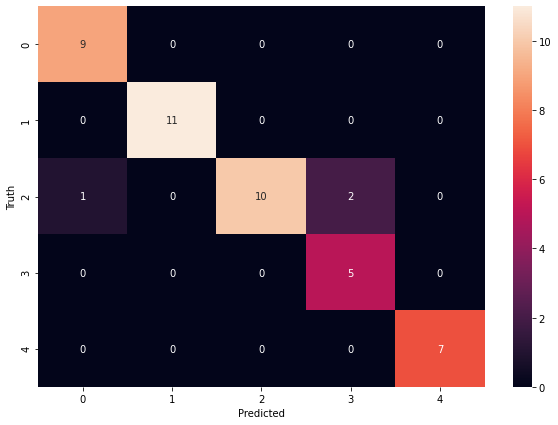

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [43]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [44]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))